# Part I - Loan Data from Prosper
## _by Godwin Akpa_

## Introduction
> This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.


## Preliminary Wrangling


In [58]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

#### Load the dataset and do a high-level overview of the resultant dataframe

In [59]:
# read in the dataset
loan = pd.read_csv('prosperloandata.csv') 

In [60]:
# high-level overview of data shape and composition
print(loan.shape)
print(loan.info())
# print first five rows of the dataset
loan.head(8)

(113937, 81)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
ListingKey                             113937 non-null object
ListingNumber                          113937 non-null int64
ListingCreationDate                    113937 non-null object
CreditGrade                            28953 non-null object
Term                                   113937 non-null int64
LoanStatus                             113937 non-null object
ClosedDate                             55089 non-null object
BorrowerAPR                            113912 non-null float64
BorrowerRate                           113937 non-null float64
LenderYield                            113937 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                          84853 non-null float64
EstimatedReturn                        84853 non-null float64
ProsperRating (numeric)                84853 non-null float64
ProsperRa

ListingKey  ListingNumber            ListingCreationDate  \
0  1021339766868145413AB3B         193129  2007-08-26 19:09:29.263000000   
1  10273602499503308B223C1        1209647  2014-02-27 08:28:07.900000000   
2  0EE9337825851032864889A          81716  2007-01-05 15:00:47.090000000   
3  0EF5356002482715299901A         658116  2012-10-22 11:02:35.010000000   
4  0F023589499656230C5E3E2         909464  2013-09-14 18:38:39.097000000   
5  0F05359734824199381F61D        1074836  2013-12-14 08:26:37.093000000   
6  0F0A3576754255009D63151         750899  2013-04-12 09:52:56.147000000   
7  0F1035772717087366F9EA7         768193  2013-05-05 06:49:27.493000000   

  CreditGrade  Term LoanStatus           ClosedDate  BorrowerAPR  \
0           C    36  Completed  2009-08-14 00:00:00      0.16516   
1         NaN    36    Current                  NaN      0.12016   
2          HR    36  Completed  2009-12-17 00:00:00      0.28269   
3         NaN    36    Current                  NaN      0.12528   
4         NaN    36    Current                  NaN      0.24614   
5         NaN    60    Current                  NaN      0.15425   
6         NaN    36    Current                  NaN      0.31032   
7         NaN    36    Current                  NaN      0.23939   

   BorrowerRate  LenderYield  ...  LP_ServiceFees  LP_CollectionFees  \
0        0.1580       0.1380  ...         -133.18                0.0   
1        0.0920       0.0820  ...            0.00                0.0   
2        0.2750       0.2400  ...          -24.20                0.0   
3        0.0974       0.0874  ...         -108.01                0.0   
4        0.2085       0.1985  ...          -60.27                0.0   
5        0.1314       0.1214  ...          -25.33                0.0   
6        0.2712       0.2612  ...          -22.95                0.0   
7        0.2019       0.1919  ...          -69.21                0.0   

   LP_GrossPrincipalLoss  LP_NetPrincipalLoss LP_NonPrincipalRecoverypayments  \
0                    0.0                  0.0                             0.0   
1                    0.0                  0.0                             0.0   
2                    0.0                  0.0                             0.0   
3                    0.0                  0.0                             0.0   
4                    0.0                  0.0                             0.0   
5                    0.0                  0.0                             0.0   
6                    0.0                  0.0                             0.0   
7                    0.0                  0.0                             0.0   

   PercentFunded  Recommendations InvestmentFromFriendsCount  \
0            1.0                0                          0   
1            1.0                0                          0   
2            1.0                0                          0   
3            1.0                0                          0   
4            1.0                0                          0   
5            1.0                0                          0   
6            1.0                0                          0   
7            1.0                0                          0   

  InvestmentFromFriendsAmount Investors  
0                         0.0       258  
1                         0.0         1  
2                         0.0        41  
3                         0.0       158  
4                         0.0        20  
5                         0.0         1  
6                         0.0         1  
7                         0.0         1  

[8 rows x 81 columns]

#### Subset the DataFrame to Select only the Important Features

In [61]:
# Define features of interest for this analysis
columns = ['ListingNumber', 'ListingCreationDate', 'ProsperRating (Alpha)', 'Occupation', 'ProsperScore', 'ListingCategory (numeric)', 
           'EmploymentStatus', 'IsBorrowerHomeowner', 'CurrentCreditLines', 'DebtToIncomeRatio', 'LoanOriginalAmount', 'LoanStatus', 
           'BorrowerState', 'IncomeRange','BorrowerAPR','BorrowerRate', 'StatedMonthlyIncome', 'Investors','Term']

In [62]:
# New subdataset
loan = loan[columns]
loan.head()

ListingNumber            ListingCreationDate ProsperRating (Alpha)  \
0         193129  2007-08-26 19:09:29.263000000                   NaN   
1        1209647  2014-02-27 08:28:07.900000000                     A   
2          81716  2007-01-05 15:00:47.090000000                   NaN   
3         658116  2012-10-22 11:02:35.010000000                     A   
4         909464  2013-09-14 18:38:39.097000000                     D   

      Occupation  ProsperScore  ListingCategory (numeric) EmploymentStatus  \
0          Other           NaN                          0    Self-employed   
1   Professional           7.0                          2         Employed   
2          Other           NaN                          0    Not available   
3  Skilled Labor           9.0                         16         Employed   
4      Executive           4.0                          2         Employed   

   IsBorrowerHomeowner  CurrentCreditLines  DebtToIncomeRatio  \
0                 True                 5.0               0.17   
1                False                14.0               0.18   
2                False                 NaN               0.06   
3                 True                 5.0               0.15   
4                 True                19.0               0.26   

   LoanOriginalAmount LoanStatus BorrowerState     IncomeRange  BorrowerAPR  \
0                9425  Completed            CO  $25,000-49,999      0.16516   
1               10000    Current            CO  $50,000-74,999      0.12016   
2                3001  Completed            GA   Not displayed      0.28269   
3               10000    Current            GA  $25,000-49,999      0.12528   
4               15000    Current            MN       $100,000+      0.24614   

   BorrowerRate  StatedMonthlyIncome  Investors  Term  
0        0.1580          3083.333333        258    36  
1        0.0920          6125.000000          1    36  
2        0.2750          2083.333333         41    36  
3        0.0974          2875.000000        158    36  
4        0.2085          9583.333333         20    36

#### Check and remove duplicate values

In [63]:
# count of duplicate rows
(loan.duplicated(subset=['ListingNumber', 'ListingCreationDate']).sum())

871

In [64]:
# extract the duplicate records
loan[loan.duplicated(subset=['ListingNumber', 'ListingCreationDate'])]

ListingNumber            ListingCreationDate ProsperRating (Alpha)  \
9             1023355  2013-12-02 10:43:39.117000000                    AA   
999           1055932  2013-12-18 14:25:17.053000000                     B   
2539          1097584  2014-01-11 07:50:08.037000000                     B   
4942           927246  2013-09-26 09:35:36.317000000                    HR   
5812           920397  2013-09-24 13:27:48.287000000                     C   
5971           894748  2013-09-16 06:59:12.297000000                     B   
6385          1066466  2013-12-10 13:39:07.220000000                     A   
7415           875616  2013-08-21 07:25:22.360000000                     C   
7538           969821  2013-10-24 13:21:31.607000000                     C   
7555           970570            2013-11-01 13:53:22                     A   
8683          1047993  2013-11-25 08:46:13.073000000                     C   
8925          1138422  2014-01-14 16:09:07.770000000                     C   
9102          1100572  2014-01-12 08:01:41.417000000                     D   
9281          1057901  2013-12-06 11:44:58.283000000                    HR   
10036         1101199  2014-01-12 10:10:41.447000000                     B   
10401          898052  2013-09-12 12:53:22.680000000                     D   
10467          890514  2013-09-07 06:25:14.057000000                     C   
11635         1069928  2013-12-13 08:05:03.380000000                     B   
11889         1063352  2013-12-09 18:54:29.140000000                     A   
11979          900913  2013-09-16 18:45:59.473000000                     A   
12379         1116810  2014-01-06 09:16:14.857000000                     C   
12595          877625  2013-08-22 20:45:22.927000000                     B   
12694         1114591  2014-01-16 11:16:58.077000000                     B   
12780         1114591  2014-01-16 11:16:58.077000000                     B   
12956          925803  2013-09-26 06:08:44.510000000                     C   
13210         1027003  2013-12-05 06:07:39.743000000                     A   
13322         1111486  2014-01-14 17:19:38.497000000                     A   
13445         1138731  2014-01-14 18:13:03.870000000                     D   
14062         1077775  2014-01-03 07:58:17.743000000                     C   
14071          898757  2013-09-12 14:20:39.077000000                     C   
...               ...                            ...                   ...   
111815        1128831  2014-01-08 17:20:36.357000000                     C   
111839        1048512  2013-11-25 10:07:03.627000000                     B   
111850         959620  2013-10-25 11:28:26.710000000                     A   
111860         996931  2013-11-15 12:47:12.287000000                     C   
111890         827053  2013-07-02 14:09:36.273000000                     B   
111991         916391  2013-09-16 21:04:08.690000000                     B   
111992         978862  2013-11-04 13:30:11.223000000                     B   
112216        1184373  2014-02-03 15:21:39.167000000                     B   
112413        1188953  2014-02-10 16:59:57.720000000                     C   
112495         969859  2013-11-01 13:04:51.400000000                     A   
112536         880829  2013-08-26 21:11:28.233000000                     A   
112603        1054075  2013-12-17 18:45:28.067000000                     D   
112854        1221869  2014-03-02 14:35:58.973000000                     C   
112882        1092778  2014-01-07 17:29:00.257000000                     C   
112919        1060784  2013-12-08 14:44:10.897000000                     C   
112924        1088357  2013-12-21 10:38:45.070000000                     B   
112935        1091759  2013-12-23 10:57:37.223000000                     C   
113025        1166367  2014-01-29 10:27:28.377000000                     D   
113136         955489  2013-10-22 13:38:29.020000000                     A   
113144         942150  2013-09

In [65]:
# Drop duplicate values
loan_df = loan.drop_duplicates(subset=['ListingNumber', 'ListingCreationDate'], keep='first')

In [66]:
# Confirm for dropped duplicates in the data
sum(loan_df.duplicated(subset='ListingNumber'))

0

#### Explore the new dataframe

In [67]:
# check for the concise summary of the dataframe,including the number of non-null values in each colum
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113066 entries, 0 to 113936
Data columns (total 19 columns):
ListingNumber                113066 non-null int64
ListingCreationDate          113066 non-null object
ProsperRating (Alpha)        83982 non-null object
Occupation                   109537 non-null object
ProsperScore                 83982 non-null float64
ListingCategory (numeric)    113066 non-null int64
EmploymentStatus             110811 non-null object
IsBorrowerHomeowner          113066 non-null bool
CurrentCreditLines           105462 non-null float64
DebtToIncomeRatio            104594 non-null float64
LoanOriginalAmount           113066 non-null int64
LoanStatus                   113066 non-null object
BorrowerState                107551 non-null object
IncomeRange                  113066 non-null object
BorrowerAPR                  113041 non-null float64
BorrowerRate                 113066 non-null float64
StatedMonthlyIncome          113066 non-null float64
Invest

In [68]:
# Check for the null values in each feature
loan_df.isnull().sum()

ListingNumber                    0
ListingCreationDate              0
ProsperRating (Alpha)        29084
Occupation                    3529
ProsperScore                 29084
ListingCategory (numeric)        0
EmploymentStatus              2255
IsBorrowerHomeowner              0
CurrentCreditLines            7604
DebtToIncomeRatio             8472
LoanOriginalAmount               0
LoanStatus                       0
BorrowerState                 5515
IncomeRange                      0
BorrowerAPR                     25
BorrowerRate                     0
StatedMonthlyIncome              0
Investors                        0
Term                             0
dtype: int64

In [69]:
# Because this is a thrift system, customers rating (ProsperRating) is the most important feature of this dataset
# thus I will select only not null rows 
loan_df = loan_df[loan_df['ProsperRating (Alpha)'].notnull()]

In [70]:
# check for the cleaned dataframe
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83982 entries, 1 to 113936
Data columns (total 19 columns):
ListingNumber                83982 non-null int64
ListingCreationDate          83982 non-null object
ProsperRating (Alpha)        83982 non-null object
Occupation                   82708 non-null object
ProsperScore                 83982 non-null float64
ListingCategory (numeric)    83982 non-null int64
EmploymentStatus             83982 non-null object
IsBorrowerHomeowner          83982 non-null bool
CurrentCreditLines           83982 non-null float64
DebtToIncomeRatio            76768 non-null float64
LoanOriginalAmount           83982 non-null int64
LoanStatus                   83982 non-null object
BorrowerState                83982 non-null object
IncomeRange                  83982 non-null object
BorrowerAPR                  83982 non-null float64
BorrowerRate                 83982 non-null float64
StatedMonthlyIncome          83982 non-null float64
Investors             

#### Filling in missing values
- **DebtToIncomeRatio**

In [71]:
# Filling missing values with mean
loan_df['DebtToIncomeRatio']=loan_df['DebtToIncomeRatio'].fillna(loan_df['DebtToIncomeRatio'].mean())

- **Occupation**

In [72]:
# Filling missing values 
loan_df['Occupation']=loan_df['Occupation'].fillna('Unknown')

In [73]:
# Check for corrected missing values
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83982 entries, 1 to 113936
Data columns (total 19 columns):
ListingNumber                83982 non-null int64
ListingCreationDate          83982 non-null object
ProsperRating (Alpha)        83982 non-null object
Occupation                   83982 non-null object
ProsperScore                 83982 non-null float64
ListingCategory (numeric)    83982 non-null int64
EmploymentStatus             83982 non-null object
IsBorrowerHomeowner          83982 non-null bool
CurrentCreditLines           83982 non-null float64
DebtToIncomeRatio            83982 non-null float64
LoanOriginalAmount           83982 non-null int64
LoanStatus                   83982 non-null object
BorrowerState                83982 non-null object
IncomeRange                  83982 non-null object
BorrowerAPR                  83982 non-null float64
BorrowerRate                 83982 non-null float64
StatedMonthlyIncome          83982 non-null float64
Investors             

#### Rename columns

In [74]:
loan_df.rename(columns = {'ProsperRating (Alpha)': 'ProsperRating', 'ListingCategory (numeric)': 'ListingCategory', 'IsBorrowerHomeowner': 'Collateral'}, inplace=True)

In [75]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83982 entries, 1 to 113936
Data columns (total 19 columns):
ListingNumber          83982 non-null int64
ListingCreationDate    83982 non-null object
ProsperRating          83982 non-null object
Occupation             83982 non-null object
ProsperScore           83982 non-null float64
ListingCategory        83982 non-null int64
EmploymentStatus       83982 non-null object
Collateral             83982 non-null bool
CurrentCreditLines     83982 non-null float64
DebtToIncomeRatio      83982 non-null float64
LoanOriginalAmount     83982 non-null int64
LoanStatus             83982 non-null object
BorrowerState          83982 non-null object
IncomeRange            83982 non-null object
BorrowerAPR            83982 non-null float64
BorrowerRate           83982 non-null float64
StatedMonthlyIncome    83982 non-null float64
Investors              83982 non-null int64
Term                   83982 non-null int64
dtypes: bool(1), float64(6), int64(5

#### Correct wrong datatypes

In [76]:
# Convert 'LoanOriginationDate' type from str to datetime 
loan_df['ListingCreationDate']=pd.to_datetime(loan_df['ListingCreationDate'])

In [77]:
# Convert 'ListingNumber' type from int to string 
loan_df['ListingNumber']=loan_df['ListingNumber'].astype(str)

In [78]:
# Convert 'ListingNumber' type from float to int
loan_df['ProsperScore']=loan_df['ProsperScore'].astype(int)

##### Extract date information from **ListingCreationDate** 

In [79]:
# Extract date information from ListingCreationDate column
loan_df['Date'] = loan_df['ListingCreationDate'].dt.date

# Extract year information from ListingCreationDate column
loan_df['Year']= loan_df['ListingCreationDate'].dt.year

In [80]:
# Convert 'date' type from str to datetime 
loan_df['Date'] = pd.to_datetime(loan_df['Date'])

# Convert 'ListingCategory' type  to str
loan_df['ListingCategory'] = loan_df['ListingCategory'].astype(str)

# Drop the ListingCreationDate column
loan_df.drop(['ListingCreationDate'], axis=1)

ListingNumber ProsperRating               Occupation  ProsperScore  \
1            1209647             A             Professional             7   
3             658116             A            Skilled Labor             9   
4             909464             D                Executive             4   
5            1074836             B             Professional            10   
6             750899             E           Sales - Retail             2   
7             768193             C                  Laborer             4   
8            1023355            AA             Food Service             9   
10            587746             C                  Fireman             7   
12           1081604             B           Sales - Retail             4   
13            840820             A             Construction             8   
14            757359             A      Computer Programmer             8   
15            577164            HR                    Other             5   
16            841846             E             Professional             4   
18            716058             A       Sales - Commission             7   
19            875565             D                  Laborer             8   
20           1011916             B        Retail Management             7   
22            706927            HR                    Other             2   
23            758964             D            Skilled Labor             5   
24           1046345             C                    Other             5   
25            950067             E    Engineer - Mechanical             3   
26            713131             E       Sales - Commission             3   
27            463083             A                Executive             9   
28            989519             C        Military Enlisted             4   
29           1051243             A                    Other             6   
30            555213             A                    Other             9   
31            643927            HR                    Other             5   
32           1132356             B                 Clerical             8   
33            478891            AA                    Other            10   
34           1180690             C                  Unknown             5   
35            544093             B        Retail Management             8   
...              ...           ...                      ...           ...   
113894        438537            AA                 Investor            10   
113895        990985             C    Engineer - Mechanical             7   
113898        451665             B           Sales - Retail             8   
113899        449436             A        Military Enlisted             8   
113900       1214162             B           Accountant/CPA             6   
113901       1011976             B                Executive             8   
113903       1182559             C              Landscaping             4   
113905        539189            HR                    Other             2   
113907       1005215            HR           Sales - Retail             2   
113908        486057             E       Sales - Commission             5   
113909        635880             C                 Clerical             7   
113910       1161059             E                Executive             2   
113911        996496             D                    Other             3   
113912       1083677            AA                Scientist            11   
113913        455673             A                  Analyst             9   
113916        667047             E             Professional             6   
113917       1028126             E                 Clerical             2   
113919        772509             D                    Other             3   
113920        804763            HR        Retail Management             2   
113924        657862             A                    Other             8   
113

#### Check for unique values of relevant features to aid our exploration

In [81]:
# Check unique ProsperRating (Alpha) Status
loan_df['ProsperRating'].unique()

array(['A', 'D', 'B', 'E', 'C', 'AA', 'HR'], dtype=object)

In [82]:
# Check unique loan status Status
loan_df.LoanStatus.unique()

array(['Current', 'Past Due (1-15 days)', 'Defaulted', 'Completed',
       'Chargedoff', 'Past Due (16-30 days)', 'Past Due (61-90 days)',
       'Past Due (31-60 days)', 'Past Due (91-120 days)',
       'FinalPaymentInProgress', 'Past Due (>120 days)'], dtype=object)

In [83]:
# Aggregate Past Due loans 
loan_df['LoanStatus'] = loan_df['LoanStatus'].apply(lambda x: x if 'Past Due' not in x else 'Past Due')

In [84]:
# convert 'LoanStatus' from string to ordinal category type
loan_level = ['Defaulted', 'Chargedoff', 'Past Due' , 'Current', 'FinalPaymentInProgress', 'Completed']
ordered_var = pd.api.types.CategoricalDtype(ordered = True, categories = loan_level)
loan_df['LoanStatus'] = loan_df['LoanStatus'].astype(ordered_var)


In [85]:
# Confirm unique values of loan status
loan_df.LoanStatus.unique()

[Current, Past Due, Defaulted, Completed, Chargedoff, FinalPaymentInProgress]
Categories (6, object): [Defaulted < Chargedoff < Past Due < Current < FinalPaymentInProgress < Completed]

In [86]:
# Check unique Employment Status
loan_df.EmploymentStatus.unique()

array(['Employed', 'Other', 'Full-time', 'Self-employed', 'Not employed',
       'Retired', 'Part-time'], dtype=object)

In [87]:
# Check unique loan term
loan_df.Term.unique()

array([36, 60, 12], dtype=int64)

In [88]:
# replace numerical values for Term with proper names
term_dict = {12 : 'Short', 36 : 'Medium', 60 : 'Long'}
loan_df['Term'] = loan_df['Term'].map(term_dict)

In [89]:
# convert Term from int to ordinal category type
term_cat = ['Short', 'Medium', 'Long']
term_var = pd.api.types.CategoricalDtype(ordered = True, categories = term_cat)
loan_df['Term'] = loan_df['Term'].astype(term_var)

In [90]:
# Check unique IncomeRange values
loan_df['IncomeRange'].unique()

array(['$50,000-74,999', '$25,000-49,999', '$100,000+', '$75,000-99,999',
       '$1-24,999', 'Not employed', '$0'], dtype=object)

In [91]:
# convert 'IncomeRange' from string to ordinal category type
income_range = ['Not employed', '$0', '$1-24,999', '$25,000-49,999', '$50,000-74,999', '$75,000-99,999',  '$100,000+']
income_range_var = pd.api.types.CategoricalDtype(ordered = True, categories = income_range)
loan_df['IncomeRange'] = loan_df['IncomeRange'].astype(income_range_var)

In [92]:
# Check unique Listing Category
loan_df['ListingCategory'].unique()

array(['2', '16', '1', '7', '13', '6', '15', '20', '19', '18', '3', '8',
       '11', '14', '9', '17', '10', '0', '5', '12'], dtype=object)

In [93]:
# replace Listing Categories with readable strings as listing names according to the data dictionary
loan_df['ListingCategory'] = loan_df['ListingCategory'].replace(['0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20'], 
                                           ['Not Available','Debt Consolidation','Home Improvement','Business','Personal Loan','Student Use','Auto','Other',
                                             'Baby&Adoption','Boat','Cosmetic Procedure','Engagement Ring','Green Loans','Household Expenses',
                                             'Large Purchases','Medical/Dental','Motorcycle','RV','Taxes','Vacation','Wedding Loans'])

In [94]:
# convert 'ProsperRating Alpha' from string to ordinal category type
rating = ['HR', 'E', 'D', 'C', 'B', 'A', 'AA']
prosper_rating = pd.api.types.CategoricalDtype(ordered = True, categories = rating)
loan_df['ProsperRating'] = loan_df['ProsperRating'].astype(prosper_rating)

In [95]:
loan_df.EmploymentStatus.unique()

array(['Employed', 'Other', 'Full-time', 'Self-employed', 'Not employed',
       'Retired', 'Part-time'], dtype=object)

In [96]:
# convert 'EmploymentStatus' from string to ordinal category type
emp_level = ['Not employed', 'Other', 'Retired','Part-time', 'Full-time', 'Employed', 'Self-employed']
ordered_var = pd.api.types.CategoricalDtype(ordered = True, categories = emp_level)
loan_df['EmploymentStatus'] = loan_df['EmploymentStatus'].astype(ordered_var)

In [97]:
# confirm changes
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83982 entries, 1 to 113936
Data columns (total 21 columns):
ListingNumber          83982 non-null object
ListingCreationDate    83982 non-null datetime64[ns]
ProsperRating          83982 non-null category
Occupation             83982 non-null object
ProsperScore           83982 non-null int32
ListingCategory        83982 non-null object
EmploymentStatus       83982 non-null category
Collateral             83982 non-null bool
CurrentCreditLines     83982 non-null float64
DebtToIncomeRatio      83982 non-null float64
LoanOriginalAmount     83982 non-null int64
LoanStatus             83982 non-null category
BorrowerState          83982 non-null object
IncomeRange            83982 non-null category
BorrowerAPR            83982 non-null float64
BorrowerRate           83982 non-null float64
StatedMonthlyIncome    83982 non-null float64
Investors              83982 non-null int64
Term                   83982 non-null category
Date             

#### Print the descriptive statistics from the dataset

In [98]:
# Numerical variables
numeric_vars = [ 'ProsperScore', 'CurrentCreditLines', 'DebtToIncomeRatio', 'LoanOriginalAmount', 
                'StatedMonthlyIncome', 'BorrowerAPR','BorrowerRate', 'StatedMonthlyIncome', 'Term']

In [99]:
# Print descriptive statistics for the column selected
loan_df[numeric_vars].describe()

ProsperScore  CurrentCreditLines  DebtToIncomeRatio  \
count  83982.000000        83982.000000       83982.000000   
mean       5.952871           10.497285           0.258692   
std        2.373897            5.316773           0.305687   
min        1.000000            0.000000           0.000000   
25%        4.000000            7.000000           0.160000   
50%        6.000000           10.000000           0.240000   
75%        8.000000           13.000000           0.310000   
max       11.000000           59.000000          10.010000   

       LoanOriginalAmount  StatedMonthlyIncome   BorrowerAPR  BorrowerRate  \
count        83982.000000         8.398200e+04  83982.000000   83982.00000   
mean          9061.224381         5.930614e+03      0.226945       0.19630   
std           6279.649648         8.268432e+03      0.080047       0.07475   
min           1000.000000         0.000000e+00      0.045830       0.04000   
25%           4000.000000         3.426938e+03      0.163610       0.13590   
50%           7500.000000         5.000000e+03      0.219450       0.18750   
75%          13500.000000         7.083333e+03      0.292540       0.25740   
max          35000.000000         1.750003e+06      0.423950       0.36000   

       StatedMonthlyIncome  
count         8.398200e+04  
mean          5.930614e+03  
std           8.268432e+03  
min           0.000000e+00  
25%           3.426938e+03  
50%           5.000000e+03  
75%           7.083333e+03  
max           1.750003e+06

### What is the structure of your dataset?

The dataset I am working with contains 83,982 loan records and 21 features. Most variables are numeric in nature,
but the variables ProsperRating, LoanStatus, WageGroup are ordered factor variables with the following levels respectively.\
(worst) ——> (best)\
['HR', 'E', 'D', 'C', 'B', 'A', 'AA']\
['Not employed', 'Other', 'Retired','Part-time', 'Full-time', 'Employed', 'Self-employed']\
['Defaulted', 'Chargedoff', 'Past Due' , 'Current', 'FinalPaymentInProgress', 'Completed']\
['Low Income', 'Medium Income', 'High Income']\
['Short Term (12)', 'Medium Term (36)', 'Long Term (60)']


### What is/are the main feature(s) of interest in your dataset?

I'm interested in answering the following questions:

>- What are the main factors affecting a loan's outcome status?
>- What are the main factors affecting the borrower's APR or interest rate?
>- Are there differences between loans depending on how large the original loan amount was?
>- What's the interest rate applied for small loans?
>- What loan terms do borrowers usually take out from Prosper? 
>- Are there any differences between loans depending on different level of employment status?
>- What is the loan taken used for the most?

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> There are so many features to explore, I suppose that the following borrower features would have the largest effect on interest rate:

> - LoanStatus
> - ProsperScore
> - IncomeRange
> - DebToIncomeRatio
> - LoanOriginalAmount
> - Term
> - ProsperRating (Alpha)
> - Employment status
> - StatedMonthlyIncome \
Please note that it is not an exhaustive list of interest rate and loans determinant. Additional features might be required.

## Univariate Exploration

> In this section, I will investigate distributions of few single variables of interest.

**Prosper's Borrowers Risk Analysis**

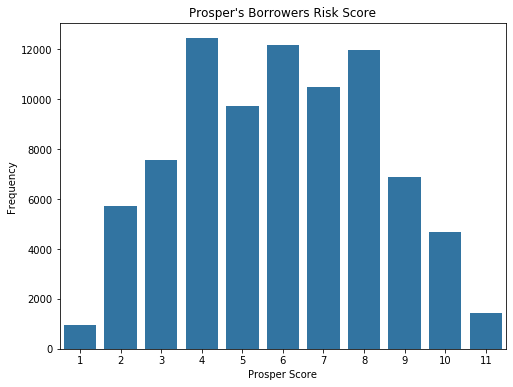

In [100]:
# Resize the chart
plt.figure(figsize=[8,6])

#color label
base_color = sb.color_palette()[0]
# Sort in Order (Using the order argument) 
#status_order = loan_df.ProsperScore.value_counts().index

#Plot ordinal variable distribution 'ProsperScore'
sb.countplot(data=loan_df, x='ProsperScore', color=base_color);
plt.xlabel("Prosper Score")
plt.ylabel('Frequency')
plt.title("Prosper's Borrowers Risk Score");
locs, labels = plt.xticks()
cat_counts = loan_df['ProsperScore'].value_counts()


**Observation**
> - Prosper Score was built using historical Prosper data. The score ranges from 1 to 11, with 11 being best or lowest risk score, and 1 being the worst or highest risk score.
> - This plot shows that the three most earned Prosper scores are 4, 6, and 8 which shows a well distributed credit risks.

**Evaluation of ProsperRating, EmploymentStatus and LoanStatus**

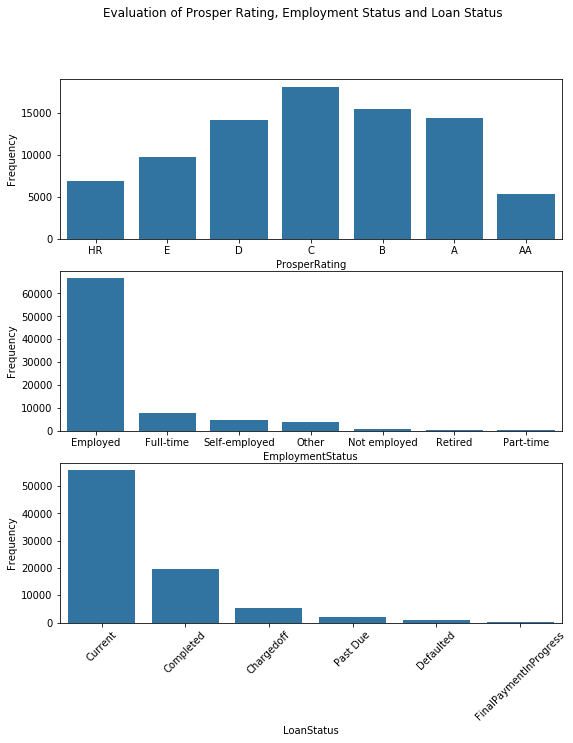

In [101]:
# let's plot all three together to get an idea of each ordinal variable's distribution.

fig, ax = plt.subplots(nrows=3, figsize = [9,10])

# Sort in Order (Using the order argument) 
emp_order = loan_df.EmploymentStatus.value_counts().index
loan_order = loan_df.LoanStatus.value_counts().index
# plotting ProsperRating, EmploymentStatus and LoanStatus together
sb.countplot(data = loan_df, x = 'ProsperRating', color = base_color, ax = ax[0])
sb.countplot(data = loan_df, x = 'EmploymentStatus', order=emp_order, color = base_color, ax = ax[1])
sb.countplot(data = loan_df, x = 'LoanStatus', order=loan_order, color = base_color, ax = ax[2])
ax[0].set_ylabel("Frequency")
ax[1].set_ylabel("Frequency")
ax[2].set_ylabel("Frequency")
plt.xticks(rotation=45)
fig.suptitle('Evaluation of Prosper Rating, Employment Status and Loan Status');

**Observation**
>- We can see that most borrowers have a good standing with Prosper majority of which have C Rating. While ratings B, A & D makes up for the other three highest Rating. Meanwhile the lowest Credit Rating is the AA Prosper Rating(with less than 10%).
>- The majority of borrowers are employed, which is evident because it wouldn't be easy to get a loan without a job.
>- More than 80% of all borrowers for the Prosper loans have good profiles, i.e either current or completed (good profiles) with more than 50% of this being current.

I'll now look at the other features in the data to see if any of them hold interesting insights.
> **'DebtToIncomeRatio', 'BorrowerAPR', 'BorrowerRate'**

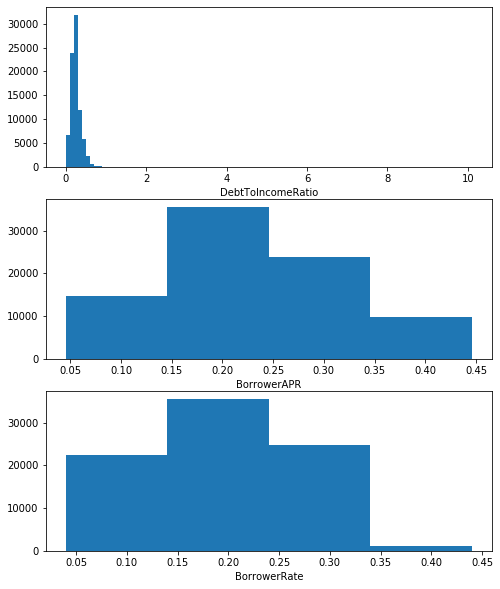

In [102]:
# plot the distribution of 'DebtToIncomeRatio', 'BorrowerAPR', and 'BorrowerRate'.
fig, ax = plt.subplots(nrows=3, figsize = [8,10])

variables = ['DebtToIncomeRatio', 'BorrowerAPR', 'BorrowerRate']
for i in range(len(variables)):
    var = variables[i]
    bins = np.arange(min(loan_df[var]), max(loan_df[var])+0.1, 0.1)
    ax[i].hist(data = loan_df, x = var, color=base_color, bins = bins)
    ax[i].set_xlabel('{}'.format(var))

plt.show()

**Observation**
> The initial plot of the 'DebtToIncomeRatio', 'BorrowerAPR', 'BorrowerRate' features show some immediate points of attention. 
>- On the 'DebtToIncomeRatio' plot, most of the data is set to the far left of the axes which suggests either some strong outliers on the right or  there are some points that take unusually small values on the left limit of the plot. It's worth taking a bit of time to xray this feature again and perform some transformations if need be.
>- On the 'BorrowerAPR', and 'BorrowerRate' plots, the binsizes are too large which hides a lot of information about the overall distribution of the data.\
**# I will be re-plotting the distribution of 'DebtToIncomeRatio', 'BorrowerAPR', and 'BorrowerRate' individually but with smaller binsizes to expose all hidden details.**


>- **Debt to Income Ratio**

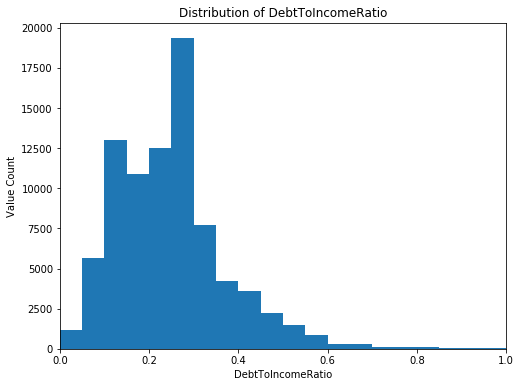

In [103]:
# Resize the chart
plt.figure(figsize=[8,6])
# Plot DebtToIncomeRatio
binsize = 0.05
bins = np.arange(0, loan_df['DebtToIncomeRatio'].max()+binsize, binsize)
plt.hist(data = loan_df, x = 'DebtToIncomeRatio', bins = bins, color=base_color)
plt.xlabel('DebtToIncomeRatio')
plt.ylabel('Value Count')
plt.title('Distribution of DebtToIncomeRatio')
plt.xlim(0,1);

**Observation**
> Generally, higher DebtToIncomeRatio demonstrates that a customer has too much debt for the amount of income. On the other hand, lower DebtToIncomeRatio means a good balance between debt and income. 
>- It appears from the figure above that most borrowers who applied for a loan have a debt to income ratio around 20% -30% 

>- **BorrowerAPR**

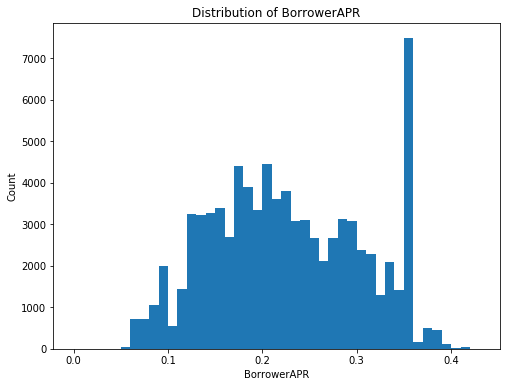

In [104]:
# Resize the chart
plt.figure(figsize=[8,6])
# Plot DebtToIncomeRatio
binsize = 0.01
bins = np.arange(0, loan_df['BorrowerAPR'].max()+binsize, binsize)
plt.hist(data = loan_df, x = 'BorrowerAPR', bins = bins, color=base_color)
plt.xlabel('BorrowerAPR')
plt.ylabel('Count')
plt.title('Distribution of BorrowerAPR');

>- BorrowerRate

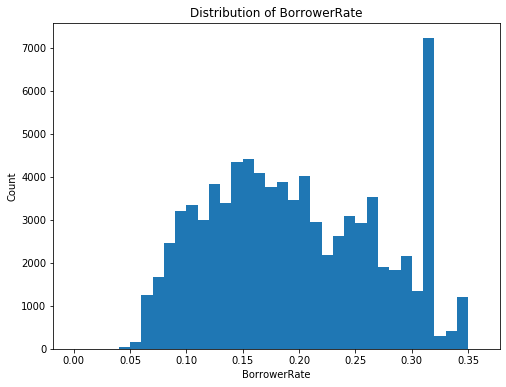

In [105]:
# Resize the chart
plt.figure(figsize=[8,6])
# Plot BorrowerRate
binsize = 0.01
bins = np.arange(0, loan_df['BorrowerRate'].max()+binsize, binsize)
plt.hist(data = loan_df, x = 'BorrowerRate', bins = bins, color=base_color)
plt.xlabel('BorrowerRate')
plt.ylabel('Count')
plt.title('Distribution of BorrowerRate');

**Observation**
> > Generally, higher BorrowerAPR suggest a higher annual percentage rate for the loan requested vise versa. The same can be said of BorrowerRate.
>- It appears from the visual above that most annual percentage rate for the loan requested by borrowers fall around 10% -35% 
>- The borrower rate visual shows that the most utilized borrowers rate is 0.32 which is the only abnormally peaked point of the almost normally distributed visual.
>- Interestingly, the shape of the BorrowerAPR and BorrowerRate distributions are very similar to one another. The BorrowerRate distribution just looks slightly different since it takes a smaller range of values, and so the bins are larger in a relative sense. 
>- It's likely that these variables will be highly correlated with one another, and probably have a strong correlation with borrowers income.

**Investors Analysis**

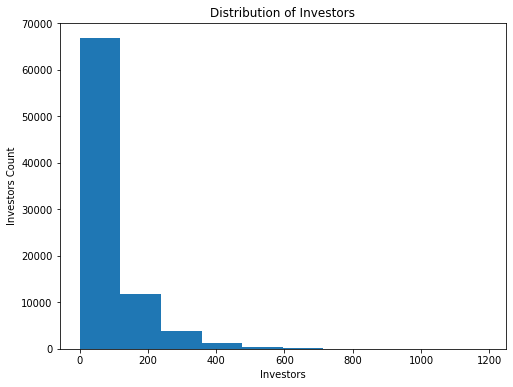

In [106]:
# Resize the chart
plt.figure(figsize=[8,6])
# Plot 'Investors'
#binsize = 0.01
#bins = np.arange(0, loan_df['Investors'].max()+binsize, binsize)
plt.hist(data = loan_df, x = 'Investors', color=base_color)
plt.xlabel('Investors')
plt.ylabel('Investors Count')
plt.title('Distribution of Investors');


In [107]:
np.log10(loan_df['Investors'].describe())

count    4.924186
mean     1.836816
std      1.979175
min      0.000000
25%      0.000000
50%      1.505150
75%      1.991226
max      3.075182
Name: Investors, dtype: float64

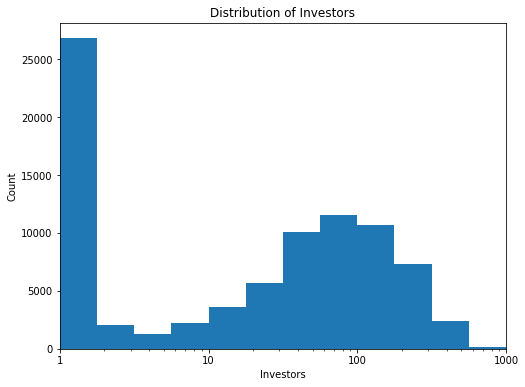

In [111]:
plt.figure(figsize=[8,6])
# plot the loan original amount against a log scale because it has a long tail
log_binsize = 0.25
bins_log = 10 ** np.arange(0, 3.1+log_binsize, log_binsize)
plt.hist(data = loan_df, x = 'Investors', bins = bins_log, color=base_color)
plt.xscale('log')
x_ticks = [0, 1, 10, 100, 1000]
x_ticks_names = [0, 1, 10, 100, 1000]
plt.xticks(x_ticks, x_ticks_names)
plt.xlim(1,1000)
plt.xlabel('Investors')
plt.ylabel('Count')
plt.title('Distribution of Investors');

**Observation**
> The Investor plot has a long-tailed distribution, with a lot of details on the low investor end, and few on the high investor end. When plotted on a log-scale, the investors distribution took an obvious normal distribution between 10 and 100 and  looks somewhat bimodal, with one high peak between 1 and 2, and a second peak a little below 100.
> The high peak at 1 implies that most of the loans were singly-funded (had single investors).

**Term**

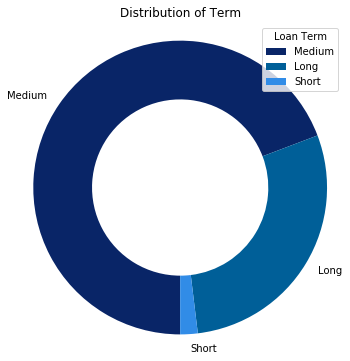

In [112]:
# Plot the new variable
plt.figure(figsize=(8,6))
# Plot Term
term_sorted = loan_df.Term.value_counts()
plt.pie(term_sorted, labels=term_sorted.index, colors= ['#092567', '#005F98', '#318CE7'], 
        startangle=270, counterclock=False, wedgeprops={'width': 0.4})
plt.axis('Square')
plt.title('Distribution of Term')
plt.legend(title="Loan Term");

**Observation**
> We have short term loans: 1 year, Medium term loans: 3 years and long term: 5 years. The most common type is the medium term loan followed by 5 year loan. Meanwhile, the short term loan is very rare.

**Borrower State, Occupation and Listing Category**

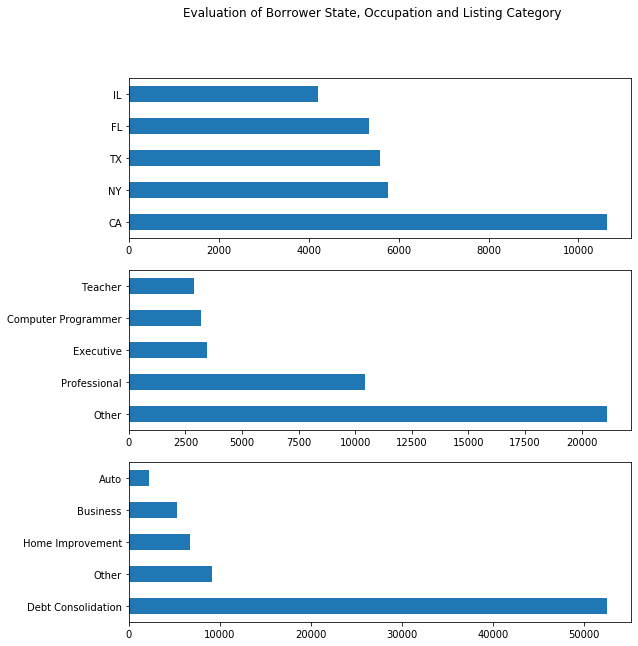

In [113]:
# let's plot all three together to get an idea of each ordinal variable's distribution.

fig, ax = plt.subplots(nrows=3, figsize = [9,10])

# plotting ProsperRating, EmploymentStatus and LoanStatus together
loan_df.BorrowerState.value_counts()[:5].plot(kind='barh', color = base_color, ax = ax[0])
loan_df.Occupation.value_counts()[:5].plot(kind='barh', color = base_color, ax = ax[1])
loan_df.ListingCategory.value_counts()[:5].plot(kind='barh', color = base_color, ax = ax[2])
fig.suptitle('Evaluation of Borrower State, Occupation and Listing Category')
plt.show();

**Observation**
>- The top 5 borrowers states are Illinois, Florida, Texas, New York and California 
>- The topmost distinct occupation of Prosper borrowers are Teacher, Computer Programmer, Executives, Professional among others.
>- Majority of the loans was taken to be utilized for Auto, Business, Home Improvement as well as for Debt Consolidation.

**Original Loan Amount**

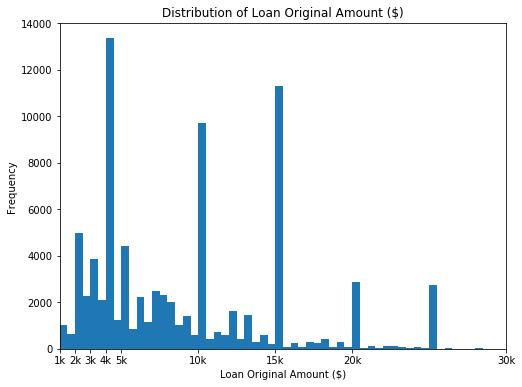

In [114]:
plt.figure(figsize=[8,6])
bins = np.arange(0, loan_df['LoanOriginalAmount'].max()+500,500)
plt.hist(data=loan_df, x='LoanOriginalAmount', bins=bins, color=base_color)
x_ticks = [1000, 2000, 3000, 4000, 5000, 10000, 15000,20000, 30000]
x_ticks_names = ['1k','2k', '3k', '4k', '5k', '10k','15k', '20k','30k']
plt.xticks(x_ticks, x_ticks_names)
plt.xlim(1000,30000)
#plt.xlim(500,35000)
plt.xlabel('Loan Original Amount ($)')
plt.ylabel('Frequency')
plt.title('Distribution of Loan Original Amount ($)');

**Observation**
> As we can see, there are three peaks at 4K, 10K, and 15K showing a polymodal distribution. This implies that these three loan sizes are the most common ones that people took out.

**Income Group**

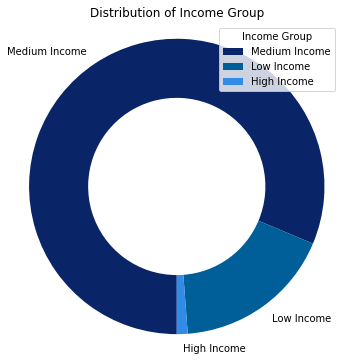

In [115]:
# define a classification function
def classify(record):
    if record["StatedMonthlyIncome"]<3000:
        return 'Low Income'
    if record["StatedMonthlyIncome"]<20000:
        return 'Medium Income'
    else:
        return 'High Income'
    
loan_df['IncomeGroup'] = loan_df.apply(classify, axis=1)

# convert string to ordinal category type
ordinal_class = ['Low Income', 'Medium Income', 'High Income']
ordered_var = pd.api.types.CategoricalDtype(ordered = True, categories = ordinal_class)
loan_df['IncomeGroup'] = loan_df['IncomeGroup'].astype(ordered_var)

# Plot the new variable
plt.figure(figsize=(8,6))

# Plot Income Group
loan_sorted = loan_df.IncomeGroup.value_counts()
plt.pie(loan_sorted, labels=loan_sorted.index, colors= ['#092567', '#005F98', '#318CE7'], 
        startangle=270, counterclock=False, wedgeprops={'width': 0.4})
plt.axis('Square')
plt.title('Distribution of Income Group')
plt.legend(title="Income Group");

**Observation**
> The majority of people who have taken out credit are the medium income earners and have an average monthly salary between 3,000 dollars and 20,000 dollars.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The initial plot of the 'DebtToIncomeRatio', 'BorrowerAPR', 'BorrowerRate', 'LoanOriginalAmount', and 'Investors' features show some immediate points of attention. 
>- On the 'DebtToIncomeRatio' plot, most of the data is set to the far left of the axes which suggests either some strong outliers on the right or  there are some points that take unusually small values on the left limit of the plot. It's worth taking a bit of time to xray this feature again and perform some transformations if need be.
>- On the 'BorrowerAPR', and 'BorrowerRate' plots, the binsizes are too large which hides a lot of information about the overall distribution of the data.
>- The loan original amount variable took on a large range of values, so I looked at the data using a log transform. Under the transformation, the data have three peaks at 4K, 10K, and 15K.
>- Investors has a long-tailed distribution, with a lot of details on the low investor end, and few on the high investor end. When plotted on a log-scale, the investors distribution took an obvious normal distribution between 10 and 100 and looks somewhat bimodal, with one high peak between 1 and 2, and a second peak a little below 100.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Yes there were some unusual distributions\
> **Operations:** 
>- Most of my cleaning efforts and adjustment were on ordering factor levels.
>- I re-plotted the distribution of 'DebtToIncomeRatio', 'BorrowerAPR', and 'BorrowerRate' individually but with smaller binsizes to expose all hidden details.
>- I used the xlim method on DebtToIncomeRatio to restrict the right--skewness, thus displaying the most important values within the percentage mark.
>- I reorganized the StatedMonthlyIncome into IncomeGroup of LowIncome, MediumIncome and HighIncome.\
> **Reason:** To make more intuitive analysis.

## Bivariate Exploration

> To start off with, I want to look at the pairwise correlations between numerical features in the data to see if any particular pairs have strong correlations. Thereafter, I will investigate the relationships between numerical variables as well as categorical and nominal variables.

### Correlation
**Plot Matrices**

In [116]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83982 entries, 1 to 113936
Data columns (total 22 columns):
ListingNumber          83982 non-null object
ListingCreationDate    83982 non-null datetime64[ns]
ProsperRating          83982 non-null category
Occupation             83982 non-null object
ProsperScore           83982 non-null int32
ListingCategory        83982 non-null object
EmploymentStatus       83982 non-null category
Collateral             83982 non-null bool
CurrentCreditLines     83982 non-null float64
DebtToIncomeRatio      83982 non-null float64
LoanOriginalAmount     83982 non-null int64
LoanStatus             83982 non-null category
BorrowerState          83982 non-null object
IncomeRange            83982 non-null category
BorrowerAPR            83982 non-null float64
BorrowerRate           83982 non-null float64
StatedMonthlyIncome    83982 non-null float64
Investors              83982 non-null int64
Term                   83982 non-null category
Date             

In [117]:
# Numerical features
numeric_vars = ['ProsperScore', 'CurrentCreditLines', 'DebtToIncomeRatio', 'LoanOriginalAmount', 
                'BorrowerAPR','BorrowerRate', 'StatedMonthlyIncome', 'Investors']
categorical_vars = ['ProsperRating', 'EmployeeStatus', 'IncomeGroup', 'LoanStatus', 'Term', 'IncomeRange']


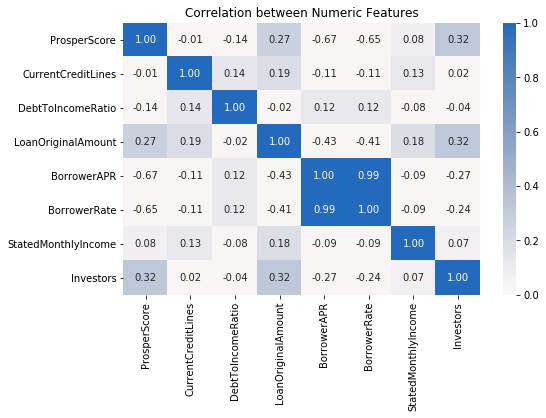

In [118]:
# correlation plot
plt.figure(figsize = [8, 5])
sb.heatmap(loan_df[numeric_vars].corr(), annot = True, fmt = '.2f',
           vmin=0, cmap = 'vlag_r', center=0)
plt.title('Correlation between Numeric Features')
plt.xticks(rotation=90)
plt.show()

**Matrix**

loan_df.shape= (83982, 22)
loan_df_samp.shape= (800, 22)


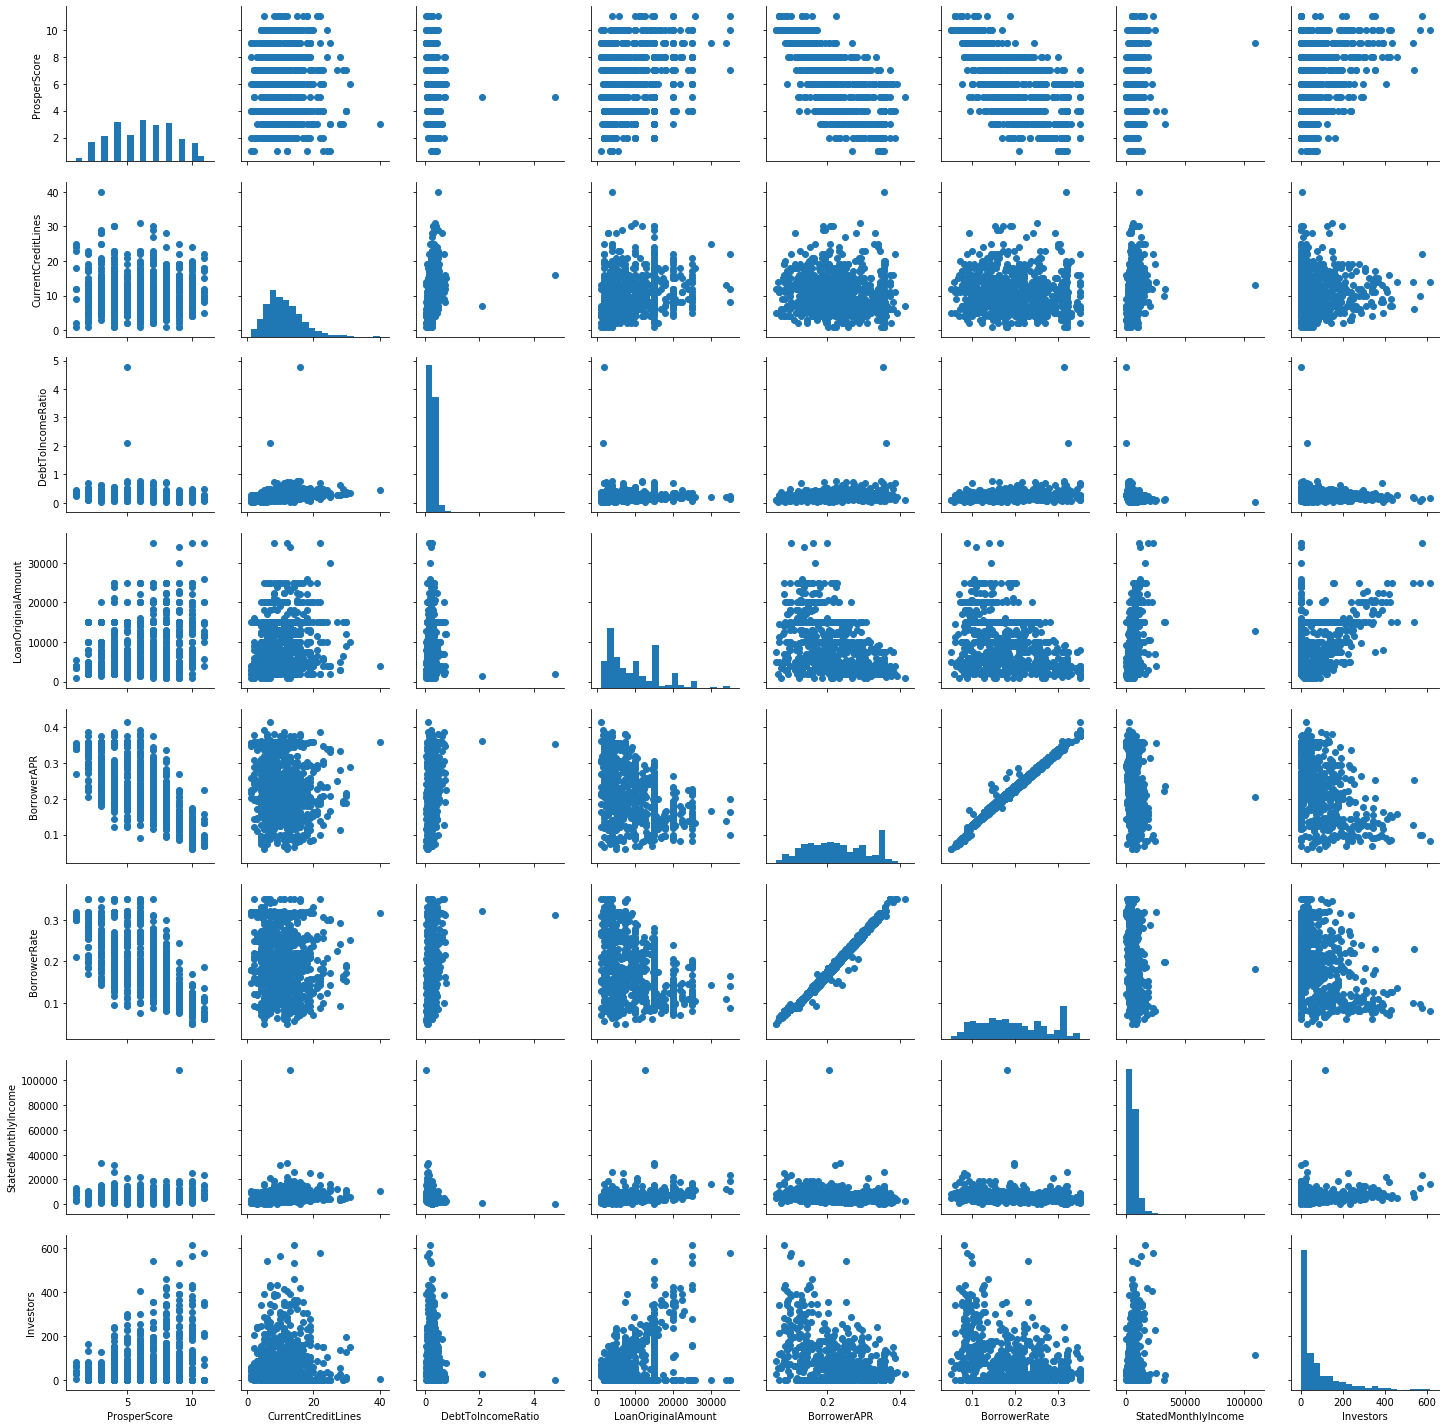

In [119]:
# plot matrix: sample 500 diamonds so that plots are clearer and they render faster
print("loan_df.shape=",loan_df.shape)
loan_df_samp = loan_df.sample(n=800, replace = False)
print("loan_df_samp.shape=",loan_df_samp.shape)

g = sb.PairGrid(data = loan_df_samp, vars = numeric_vars)
g = g.map_diag(plt.hist, bins = 20)
g.map_offdiag(plt.scatter);

**Observation**
>- The BorrowerRate and Borrower APR are highly and positively correlated with one another with correlation coefficient of 0.99.
>- Moreover, there is a moderate and negative correlation between interest rate and Loan amount.
>- On the other hand, most of the remaining variables doesn't present a strong correlation.\
Let's move on to look at how these numerical variables correlate with the categorical and ordinal variables.

**Quantititative vs Quantitative Variables Analysis**

>- **Relationship between Prosper Score and Investors**

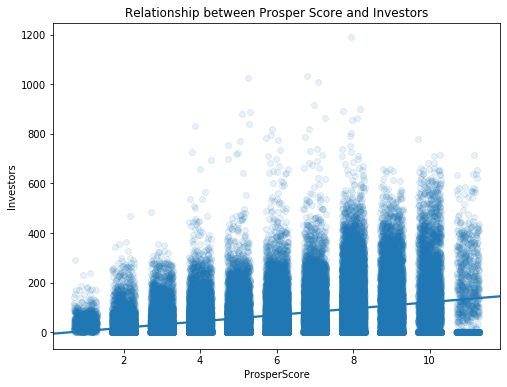

In [120]:
#Resize the plot
plt.figure(figsize=(8,6))
#plot scatterplot
sb.regplot(data=loan_df, x='ProsperScore', y='Investors', x_jitter=0.3, scatter_kws={'alpha':1/10})
plt.title('Relationship between Prosper Score and Investors');

**Observation**
> The trend line suggests a slight upward trend in investors over prosper score. This implies the investors bias and preference to invest in borrowers with higher prosper score.

>- **Relationship between Prosper Score and DebtToIncomeRatio**

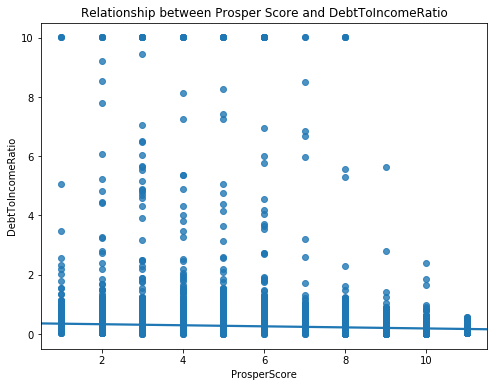

In [121]:
#Resize the plot
plt.figure(figsize=(8,6))
#plot scatterplot
sb.regplot(data=loan_df, y='DebtToIncomeRatio', x='ProsperScore')
plt.title('Relationship between Prosper Score and DebtToIncomeRatio');

**Observation**
> As already dipicted by the correlation plot between the two variables (-0.14), there is a slight downward trend of DebtToIncomeRatio against Prosper Score. Thus, for every rise in DebtToIncomeRatio, there is a corresponding drop in Prosper Score.

>- **Relationship between BorrowerAPR and Original Loan Amount**

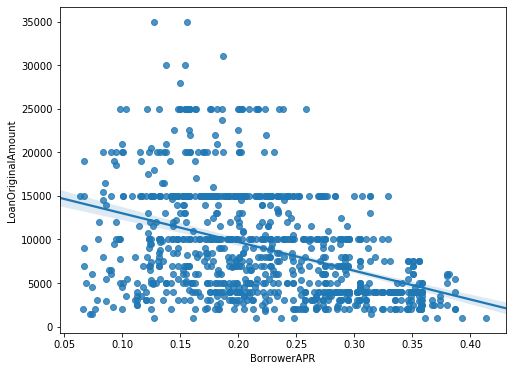

In [122]:
#Resize the plot
plt.figure(figsize=(8,6))
#plot scatterplot
loan_samp = loan_df.sample(n=1000, replace=False)
sb.regplot(data=loan_samp, x='BorrowerAPR', y='LoanOriginalAmount');

**Observation**
> The relationship between BorrowerAPR and LoanOriginalAmount shows that smaller rates are given to borrowers with high loan original amount.

>- **Evolution of BorrowerRate**

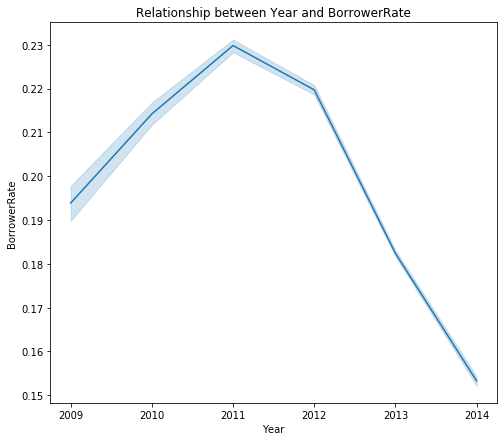

In [123]:
#plot lineplot 
plt.figure(figsize=(8,7))
# plot the lineplot for Year vs BorrowerRate
sb.lineplot(data=loan_df, x='Year', y='BorrowerRate')
plt.title('Relationship between Year and BorrowerRate');

**Observation**
> This visual shows that the borrower rate increased significantly in 2011 before experiencing a downward trend observed since 2012.

**Quantititative vs Qualitative Variables Analysis**

>- **Relationship between Loan Term and Income Group**

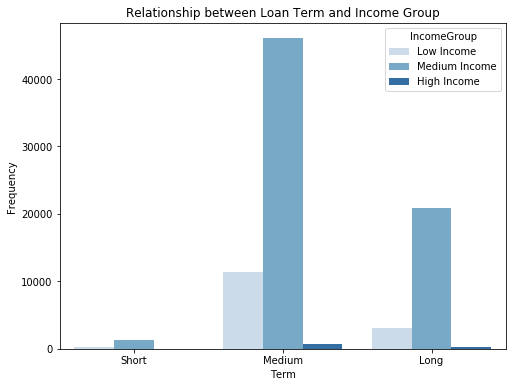

In [125]:
plt.figure(figsize=(8,6))
#plot countplot 
sb.countplot(data=loan_df, x='Term', hue='IncomeGroup', palette='Blues')
plt.title('Relationship between Loan Term and Income Group')
plt.ylabel('Frequency')
plt.show();

**Observation**
>- We can see clearly that Short term loans has the closest ration between all wage groups, while the long term loans has the most distinct ratio.
>- Across all the loan terms, medium income earners made the most loan request.
>- Also, most customers prefer medium term loans.

>- **Relationship between ProsperRating and IncomeRange**

In [661]:
loan_df.IncomeRange.value_counts()

$50,000-74,999    25326
$25,000-49,999    23923
$100,000+         15056
$75,000-99,999    14362
$1-24,999          4621
Not employed        649
$0                   45
Name: IncomeRange, dtype: int64

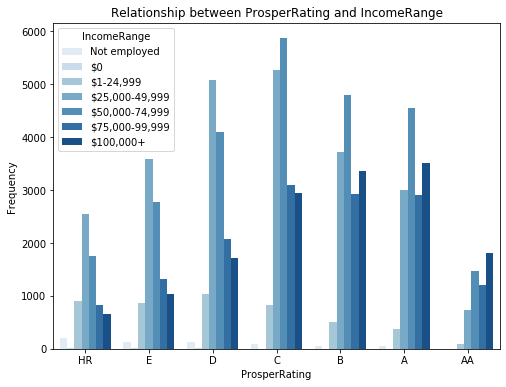

In [126]:
plt.figure(figsize=(8,6))
#plot countplot 
sb.countplot(data=loan_df, x='ProsperRating', hue='IncomeRange', palette='Blues')
plt.title('Relationship between ProsperRating and IncomeRange')
plt.ylabel('Frequency');

**Observation**
> Except for AA (with income range 100,000 dollarsand above), all the borrowers regardless of their prosper rating has an income range between 25,000 dollars and 74,999 dollars which further buttresses the fact that medium income earners requested for most loans from Prosper.

**Faceting**

>- **Overview of the spread of CurrentCreditLines across ProsperRating**

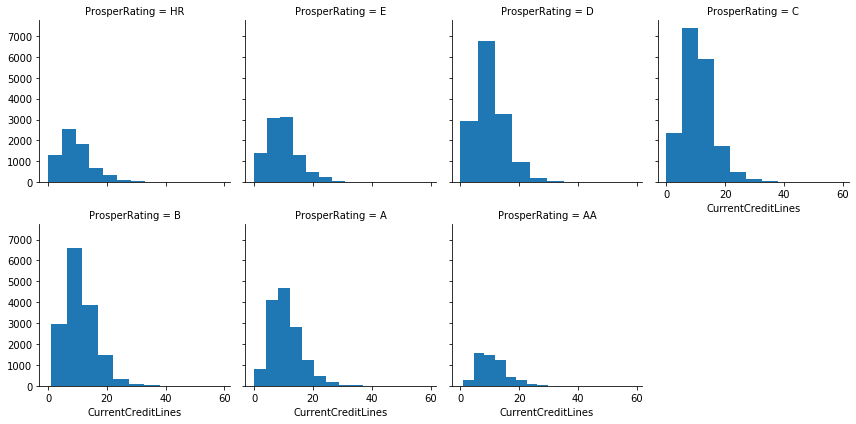

In [663]:
g = sb.FacetGrid(data=loan_df, col='ProsperRating', col_wrap=4)
g.map(plt.hist, 'CurrentCreditLines');

>- **Relationship between Borrower Rate, ProsperScore and Term, Collateral, IncomeGroup**

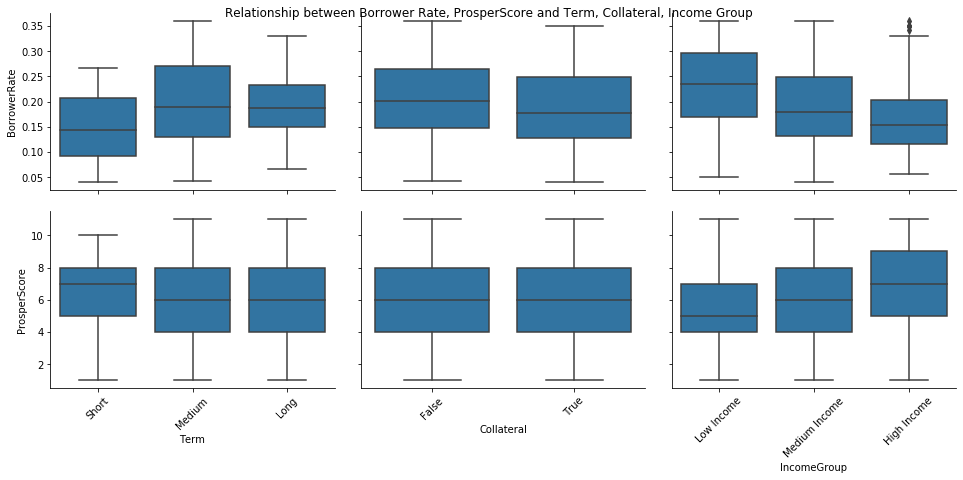

In [128]:
# plot matrix of numeric features against categorical/ordinal features.

#define boxgrid function
def boxgrid(x, y, **kwargs):
    sb.boxplot(x, y, color = base_color)
    plt.xticks(rotation=45);

g = sb.PairGrid(data = loan_df, y_vars = ['BorrowerRate', 'ProsperScore'], 
                x_vars = ['Term', 'Collateral', 'IncomeGroup'],height = 3, aspect = 1.5)
g.map(boxgrid)
plt.suptitle('Relationship between Borrower Rate, ProsperScore and Term, Collateral, Income Group');

**Observation**
> It appears that there are some negative relationships between the categorical/ordinal variables selected and the interest rate. 
>- Its worthy of note that, more restrictive credit condition (higher rate) is applied to Medium and Long term loans than the short term loans.
>- Another observation is that borrowers who have collaterals(homeowners) and higher income have lower rates than those with Low Income or who don't have any collateral .
>- Meanwhile, short term loans, having collateral and higher income is necessary for having a high Prosper Score.

>- **Relationship between Borrower Rate, ProsperScore and EmploymentStatus, IncomeRange**

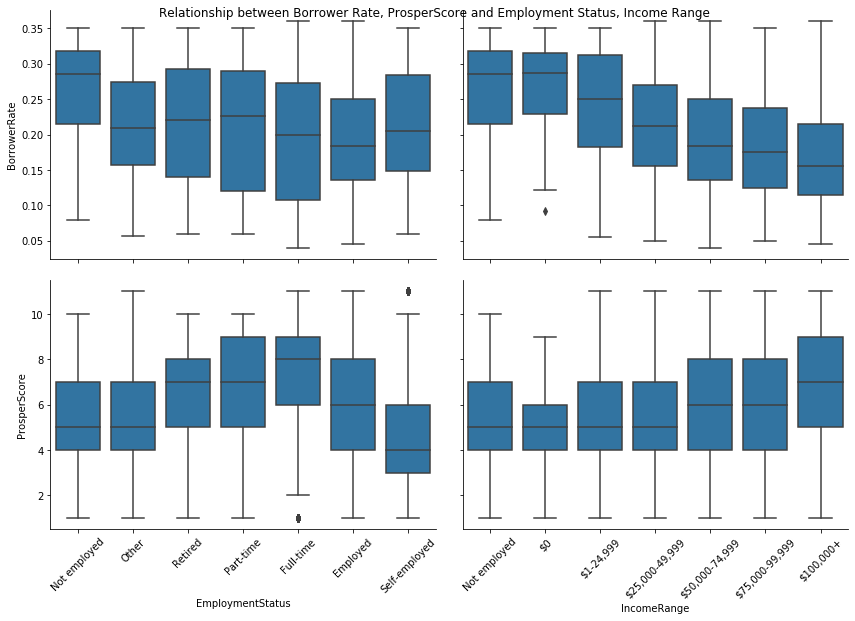

In [129]:
g = sb.PairGrid(data = loan_df, y_vars = ['BorrowerRate', 'ProsperScore'], 
                x_vars = ['EmploymentStatus', 'IncomeRange'],height = 4, aspect = 1.5)
g.map(boxgrid)
plt.suptitle('Relationship between Borrower Rate, ProsperScore and Employment Status, Income Range');

**Observation**
>- Just as predicted, the Unemployed and those with less than 25,000 dollars have more restrictive credit condition (higher rate) than the people who are employed or have more 25,000 dollars and above.
>- Meanwhile, being employed and having a income range above 25,000 dollars is proportional to having a high prosper score.

>- **Relationship between Borrower Rate and ProsperScore, ProsperRating, LoanStatus**

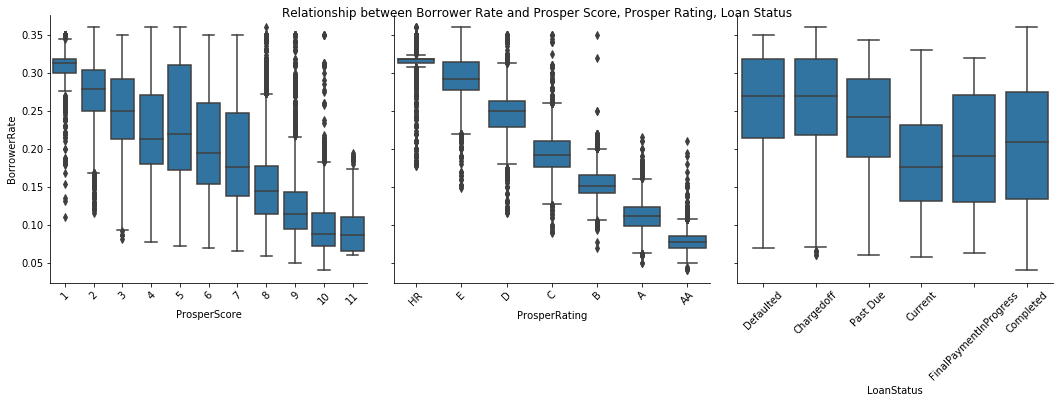

In [130]:
#plot multiple figures with Violin plot   
g = sb.PairGrid(data = loan_df, y_vars = ['BorrowerRate'], x_vars = ['ProsperScore','ProsperRating', 'LoanStatus'],
                height = 4.5, aspect = 1.1)

g.map(boxgrid)
plt.suptitle('Relationship between Borrower Rate and Prosper Score, Prosper Rating, Loan Status');

**Observation**
> >- The borrowers rate is inversely proportional to Prospers Score and Rating at any given time (the higher the score or rating, the lower the interest rate) 
>- We can conclude that the Prosper score and Prosper Rating are the two most excellent determinant factor of borrower's rate.
>- Borrowers with AA prosper ratings could expect an APR that will likely fall into the 2-20% range, whereas borrowers with bad ratings (HR) could expect their interest rate to go as high as 38%!
>- Also, borrowers with poor loan status (Defaulted, ChargedOff and Past Due) have a higher interest rates as a result.

>- **Relationship between Borrower APR (Annual Cost), Original Loan Amount and some categorical variables**

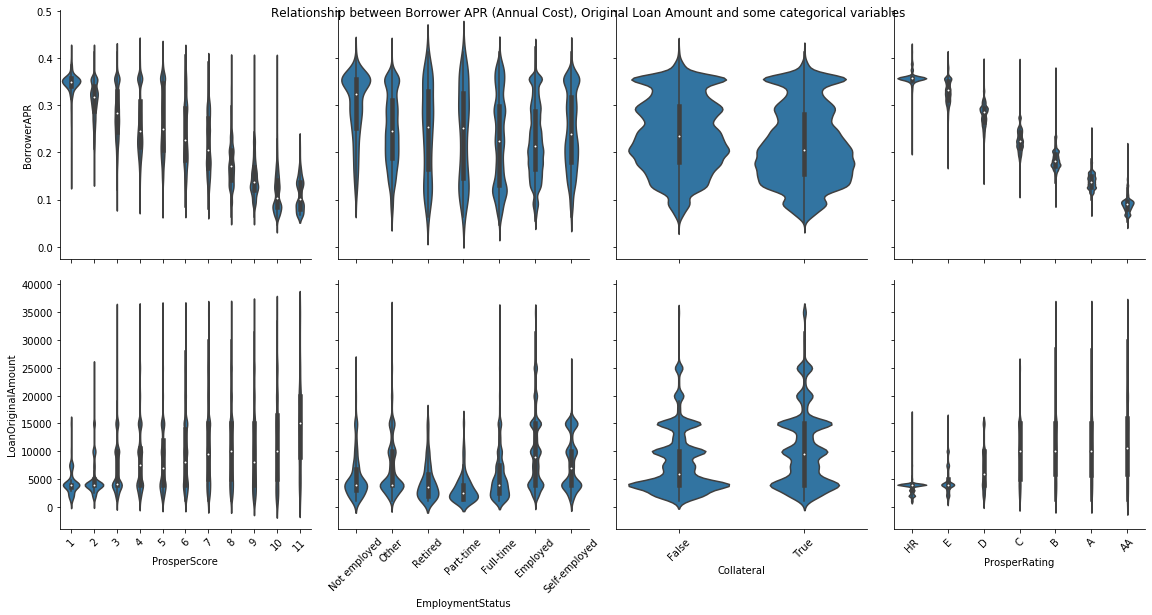

In [131]:
#define violin function
def violin(x, y, **kwargs):
    sb.violinplot(x, y, color = base_color)
    plt.xticks(rotation=45);
#plot multiple figures with Pairgrid
g = sb.PairGrid(data = loan_df, y_vars = ['BorrowerAPR', 'LoanOriginalAmount'], 
                x_vars = ['ProsperScore','EmploymentStatus','Collateral', 'ProsperRating'], 
                height = 4)
g.map(violin)
plt.suptitle('Relationship between Borrower APR (Annual Cost), Original Loan Amount and some categorical variables')
plt.show();

**Observation**
> Interestingly, it appears that there are some negative relationships between the categorical variables and the two numeric variables of interest. The customers with high prosper score, who are employed, has collateral and has the best Prosper Ratings seems to have a high loan original amount and consequently a lower borrowing rate.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

>The objective of this work is to investigate factors affecting interest rate and loan amount:
>- There is a moderate and negative correlation between interest rate and loan amount.
>- Also there are some negative and strong relationships between the categorical/ordinal variables selected and the interest rate. For example, Unemployed customers, borrowers without collataral and those with low income ranges have more restrictive credit condition (higher rate) than the people who have jobs, collataral and high income ranges. 
>- Similarly, there is a strong indication that the Prosper score, ProsperRating and LoanOriginalAmount are excellent determinant factors of borrower's interest rates and loan amount. Thus, we can conclude that the higher the Score, Rating and Original Amount, the lower the rate. In other words, borrowers with AA prosper ratings could expect an APR that will likely fall into the 2-15% range, whereas borrowers with bad ratings (HR) could expect their interest rate to go as high as 40%!

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Yes. For instance the Investor is related to LoanOriginalAmount as ProsperScore.

## Multivariate Exploration

> The main thing I want to explore in this part of the analysis is how the categorical measures of Prosper Rating and IncomeGroup, IncomeRange play into major determinants of loan interest rate like BorrowerRate, BorrowerAPR and LoanOriginalAmount.

**ProsperRating Vs Investors by Income Group**

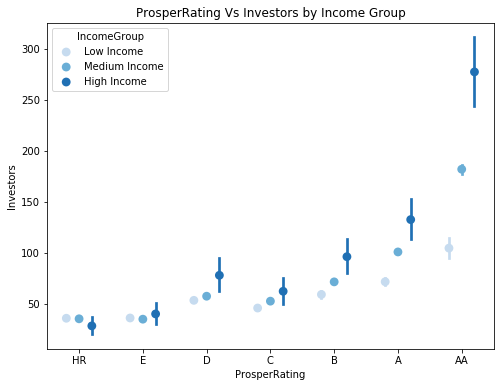

In [132]:
#Resize the plot
fig = plt.figure(figsize = [8,6])

# plot the pointplot
ax = sb.pointplot(data = loan_df, x = 'ProsperRating', y = 'Investors', hue = 'IncomeGroup',
           palette = 'Blues', linestyles = '', dodge = 0.4)
plt.title('ProsperRating Vs Investors by Income Group')
plt.ylabel('Investors')
plt.show();

**Observation**
>- Borrowers with good Prosper Ratings tend to have many investors contribute to their loan amount than those with poor ratings.
>- Similarly, borrowers with good Prosper Rating tend to be in the high income group.

**Evolution of BorrowerRate, Investors over years for Homeowners & Non-Homeowners**

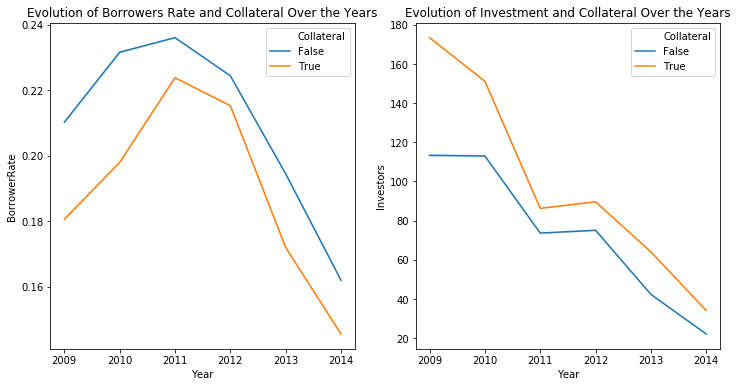

<Figure size 576x504 with 0 Axes>

In [133]:
fig, ax = plt.subplots(ncols = 2, figsize = [12,6])
# plot the lineplot to analyze homeowner's and non-homeowner's rate over the years
plt.figure(figsize=(8,7))
g=sb.lineplot(data=loan_df, x='Year', y='BorrowerRate', hue='Collateral',ci=True, ax = ax[0])
ax[0].set_title('Evolution of Borrowers Rate and Collateral Over the Years')

# plot the lineplot to analyze trend of investment in homeowner's and non-homeowner's loans over the years
g=sb.lineplot(data=loan_df, x='Year', y='Investors', hue='Collateral',ci=True, ax = ax[1])
ax[1].set_title('Evolution of Investment and Collateral Over the Years');

**Observation**
> As we can see, the two rates and investors have almost the same evolution profile. 
>- As expected, rates for individuals with collateral(homeowner) are lower than those without collateral but the gap between the rate has decreased significantly since 2011. Also and investors tend to invest more with borrowers with collateral. Meanwhile, there has been a continuous decline in the number of investors in the loan requests of borrowers (regardless of their collateral) except for a slight stability between 2011 and 2012. 

**Borrower Rate by Prosper rating and Income Group**

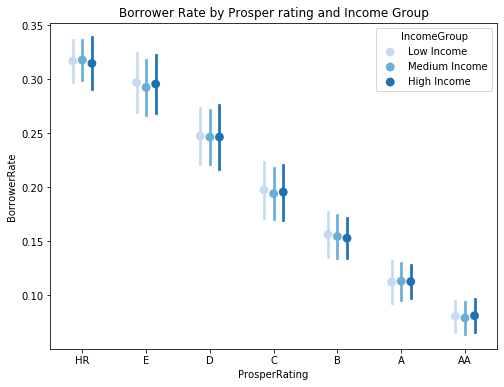

In [134]:
#plot pointplot 
fig = plt.figure(figsize = [8,6])
ax = sb.pointplot(data = loan_df, x = 'ProsperRating', y = 'BorrowerRate', hue='IncomeGroup',
                 palette='Blues', linestyles = '', dodge = 0.3, ci='sd', color=base_color)
plt.title('Borrower Rate by Prosper rating and Income Group');

**Observation**
> We can see that the rates applied on low income are generally higher than the rates applied on other wage groups, regardless of the prosper rating (with the exception of the AA rating (almost same rates for the three wage groups) and D and HR rating (same rates for low and medium wages), all other ratings supports our intial assumption. This is obvious, when the income is lower it increases the risk of this operation involving a rise in rates. Of course, as I already mentioned, the rates are the lowest for individuals with a good rating, this is also considered.

**Borrower APR by Prosper Rating and Loan Status**

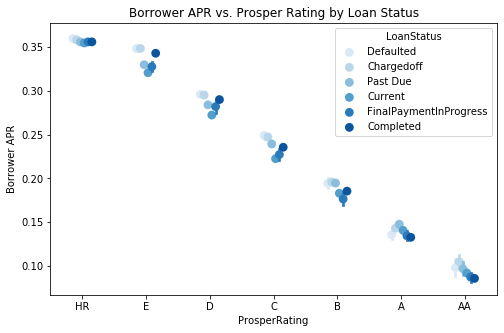

In [135]:
fig = plt.figure(figsize = [8,5])
ax = sb.pointplot(data = loan_df, x = 'ProsperRating', y = 'BorrowerAPR', hue = 'LoanStatus',
           palette = 'Blues', linestyles = '', dodge = 0.3)
plt.title('Borrower APR vs. Prosper Rating by Loan Status')
plt.ylabel('Borrower APR')
plt.show();

**Observation**
> For all Prosper Ratings except for "A",and "AA", Defaulted and charged off loans usually have a higher Borrower APR compared to completed, payment in progress or current loans(good records).
> Generally, the negative correlation between ProsperRating and BorrowerAPR is explicitly shown here, those with good rating have a lower rate vise versa.

**Loan Amount by Collateral and Income Group**

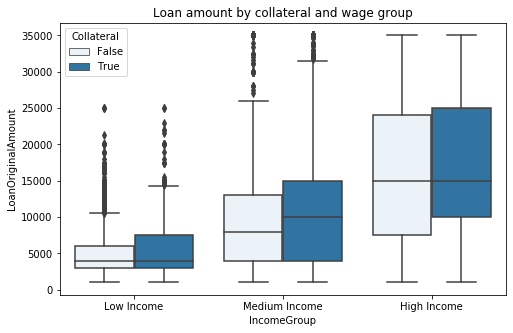

In [136]:
#plot boxplot
plt.figure(figsize = [8,5])
sb.boxplot(data = loan_df, x = 'IncomeGroup', y = 'LoanOriginalAmount',
           hue = 'Collateral' ,color = base_color)
plt.title('Loan amount by collateral and wage group');

**Observation**
> As shown in this visual, having a collateral and a higher wage help getting higher loan amount. It is clearly visible that being a home owner is a very important element to getting a higher loan amount.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> I extended my investigation of loan and interest rate against the most explanatory determinants in this section.
>- The multivariate exploration here showed that for people who have lower credit scores, banks applies more restricted credit conditions (higher interest rates) than people with good status.
>- Another point is that, there is a difference between the rates applied according to the maturities. In other words, We note that the rates applied on low wages are generally higher than the rates applied on other wage groups, regardless of the prosper rating (with the exception of the AA rating (almost same rates for the three wage groups) and D rating (same rates for low and high wages), all other ratings supports our intial assumption. This is obvious, when the wage is lower it increases the risk of this operation involving a rise in rates. Of course, as it is always mentioned, the rates are the lowest, for individuals with a good rating, this is also considered.
>- In parallel, for all Prosper Ratings except for "A",and "AA", Defaulted and charged off loans usually have a higher Borrower APR compared to completed or current loans(good records).
>- Finally, having a collateral and a higher wage help getting higher loan amount. It is clearly visible that having collateral is a very important requirement to get a higher loan amount.

### Were there any interesting or surprising interactions between features?

> I have found that the gap between rates applied for home owners and non home owners has been nosediving since 2011.

## Conclusions
I focused on the influence of some variables on interest rate and loan amount. I followed up from introducing the loan status and loan amount variable and plotting their distribution to creating violin plots, box plots and line plots to dig deeper into the relationship between my variables of interest and interest rates and loan amount in order to achive key insights stated below.

**Findings**
>1. Most borrowers have a good standing with Prosper majority of which have earned C Rating while ratings B, A & D makes up for the other three highest Rating. Meanwhile the lowest Credit Rating is the AA Prosper Rating(with less than 10%).
>2. The majority of borrowers are employed, which is evident because it wouldn't be easy to get a loan without a job.
>3. Majority of the loans was taken to be utilized for Auto, Business, Home Improvement as well as for Debt Consolidation.
>4. The three most common loan sizes that people took out are 4K, 10K, and 15K. Consequently, the majority of borrowers who have taken out credits are the medium income earners and have an average monthly salary between 3,000 dollars and 20,000 dollars.
>5. The investors plot shows that most of the loans were singly-funded (had single investors). The investors however have a bias and preference for investing with borrowers with higher prosper score and rating.
>6. Except for AA (with income range 100,000 dollarsand above), all the borrowers regardless of their prosper rating has an income range between 25,000 dollars and 74,999 dollars which further buttresses the fact that medium income earners requested for most loans from Prosper.
>7. Its worthy of note that, more restrictive credit condition (higher rate) is applied to Medium and Long term loans than the short term loans.
>8. As expected, rates for individuals with collateral(homeowner) are lower than those without collateral but the gap between the rate has decreased significantly since 2011. Also and investors tend to invest more with borrowers with collateral. Meanwhile, there has been a continuous decline in the number of investors in the loan requests of borrowers (regardless of their collateral) except for a slight stability between 2011 and 2012.

**Summary**
> There is a moderate and negative correlation between interest rate and loan amount. This corresponds to negative/strong relationships between the categorical/ordinal variables selected and the interest rate. For example, Unemployed customers, borrowers without collataral, borrowers with poor loan status (Defaulted, ChargedOff and Past Due) and those with low Prosper Score, Prosper Rating, stated monthly income and income ranges (less than 25,000 dollars) have more restrictive credit condition (higher rate) than the those who have jobs, collataral, good loan status (current, Final payment in Progress or completed) and high Prosper Score, Prosper Rating, stated monthly income and income ranges (25,000 dollars and above).\
> Thus, we can conclude that these variables are the most excellent determinant factors of borrower's interest rates and loan amount. 


